<div style="color:white; background-color: black; padding: 20px; border-radius:8px; font-size:26px"><b style="font-weight: 700;"><center>Motivation Challenge</center></b></div>

<div style="background-color: white; padding: 10px; border: 1px solid #ccc; border-radius: 5px; color: black;">
    <p style="font-size: 18px; margin-bottom: 5px;"><strong>The Data</strong></p>

- The data consists of information from 49 subjects.
- For each person, there are answers to seven questions related to 12 motivational categories.
- The data is scaled from -2 to +2.

</div>

### Columns (Motivations)

| Columns (Motivations)  |
| ----------------------- |
| Patient_ID              |
| Power_and_influence     |
| Sense_of_community      |
| Curiosity               |
| Appreciation            |
| Collector               |
| Sense_of_purpose        |
| Food                    |
| Movement                |
| Emotional_calm          |
| Order                   |
| Eros_and_Beauty         |
| Competition             |

<div style="background-color: white; padding: 10px; border: 1px solid #ccc; border-radius: 5px; color: black; margin-top: 20px;">
    <p style="font-size: 18px;"><strong>Questions</strong></p>

**Question 1**: Is it possible to group patients based on their similarity in answers? If so, how many groups would exist?

**Question 2**: Is it possible to group motivations? For example, do Collectors and Curiosity cluster together?

</div>



In [2]:
# Import the necessary libraries
import openpyxl
import pandas as pd                         
import numpy as np                         
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import seaborn as sns
sns.set(style="darkgrid")

import copy
import scipy.stats as st
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from yellowbrick.cluster import KElbowVisualizer


# Avoid warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# load the data
df = pd.read_excel("D:\Data_Science\DS_team_practivce\Motivation_Challenge_Test.xlsx", na_values=np.nan)
display(df.head(5))
print(df.shape)

,Patient_ID,Power_and_influence,Sense_of_community,Curiosity,Appreciation,Collector,Sense_of_purpose,Food,Movement,Emotional_calm,Order,Eros_and_Beauty,Competition
0,P1,-0.428571,-0.285714,-0.428571,-0.428571,-0.285714,0.000000,-0.428571,-0.714286,0.000000,-0.428571,-0.285714,-0.285714
1,P2,0.285714,0.142857,1.000000,0.285714,0.571429,-0.428571,1.428571,-1.857143,1.142857,-0.428571,0.285714,-0.142857
2,P3,1.285714,0.571429,0.285714,0.714286,0.428571,0.428571,1.428571,0.571429,1.428571,1.000000,1.142857,0.714286
3,P4,1.428571,-0.142857,1.142857,0.428571,0.428571,0.000000,1.285714,-0.285714,1.428571,0.857143,1.000000,0.571429
4,P5,0.000000,0.000000,0.428571,0.714286,0.285714,0.285714,1.000000,-0.857143,1.285714,0.857143,0.142857,-0.142857


(49, 13)


<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

## **Exploratory Data Analysis**

</div>

In [140]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           49 non-null     object 
 1   Power_and_influence  49 non-null     float64
 2   Sense_of_community   49 non-null     float64
 3   Curiosity            49 non-null     float64
 4   Appreciation         49 non-null     float64
 5   Collector            49 non-null     float64
 6   Sense_of_purpose     49 non-null     float64
 7   Food                 49 non-null     float64
 8   Movement             49 non-null     float64
 9   Emotional_calm       49 non-null     float64
 10  Order                49 non-null     float64
 11  Eros_and_Beauty      49 non-null     float64
 12  Competition          49 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.1+ KB


In [141]:
# Checking for duplicates
print('Number of duplicates in the dataset: ', df.duplicated().sum())

Number of duplicates in the dataset:  0


In [142]:
# Data types
df.dtypes

Patient_ID              object
Power_and_influence    float64
Sense_of_community     float64
Curiosity              float64
Appreciation           float64
Collector              float64
Sense_of_purpose       float64
Food                   float64
Movement               float64
Emotional_calm         float64
Order                  float64
Eros_and_Beauty        float64
Competition            float64
dtype: object

In [143]:
# data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Power_and_influence,49.0,0.483965,0.680021,-1.571429,0.285714,0.571429,0.857143,1.571429
Sense_of_community,49.0,0.119534,0.527595,-1.142857,-0.142857,0.142857,0.571429,1.285714
Curiosity,49.0,0.714286,0.470200,-0.428571,0.428571,0.857143,1.000000,1.714286
Appreciation,49.0,0.562682,0.428976,-0.428571,0.285714,0.571429,0.857143,1.285714
Collector,49.0,0.032070,0.692074,-1.428571,-0.428571,-0.142857,0.428571,1.571429
Sense_of_purpose,49.0,0.043732,0.477561,-1.000000,-0.285714,0.000000,0.285714,1.142857
Food,49.0,0.725948,0.635431,-1.000000,0.428571,0.714286,1.142857,1.857143
Movement,49.0,-0.416910,0.832399,-1.857143,-0.857143,-0.571429,0.000000,1.857143
Emotional_calm,49.0,1.049563,0.484935,-0.142857,0.714286,1.000000,1.428571,1.857143
Order,49.0,0.489796,0.601868,-1.428571,0.285714,0.571429,0.857143,1.857143


<div style="background-color:  #edeae5; padding: 10px;color: black;">
    <h2 style="font-size: 18px; margin-bottom: 10px;">EDA Summary:</h2>
    <ul style="font-size: 14px; margin-bottom: 5px;">
        <li>No missing values.</li>
        <li>No duplicates.</li>
        <li>The feature <em>Patient Id</em> is not necessary for the analysis.</li>
        <li>The features correspond was scaled to scores with range [-2,2]. </li>
    </ul>
    
</div>

<div style="background-color:  #edeae5; padding: 10px;color: black;">

We used sns.pairplot to visualize the overall data distribution and relationships.

</div>


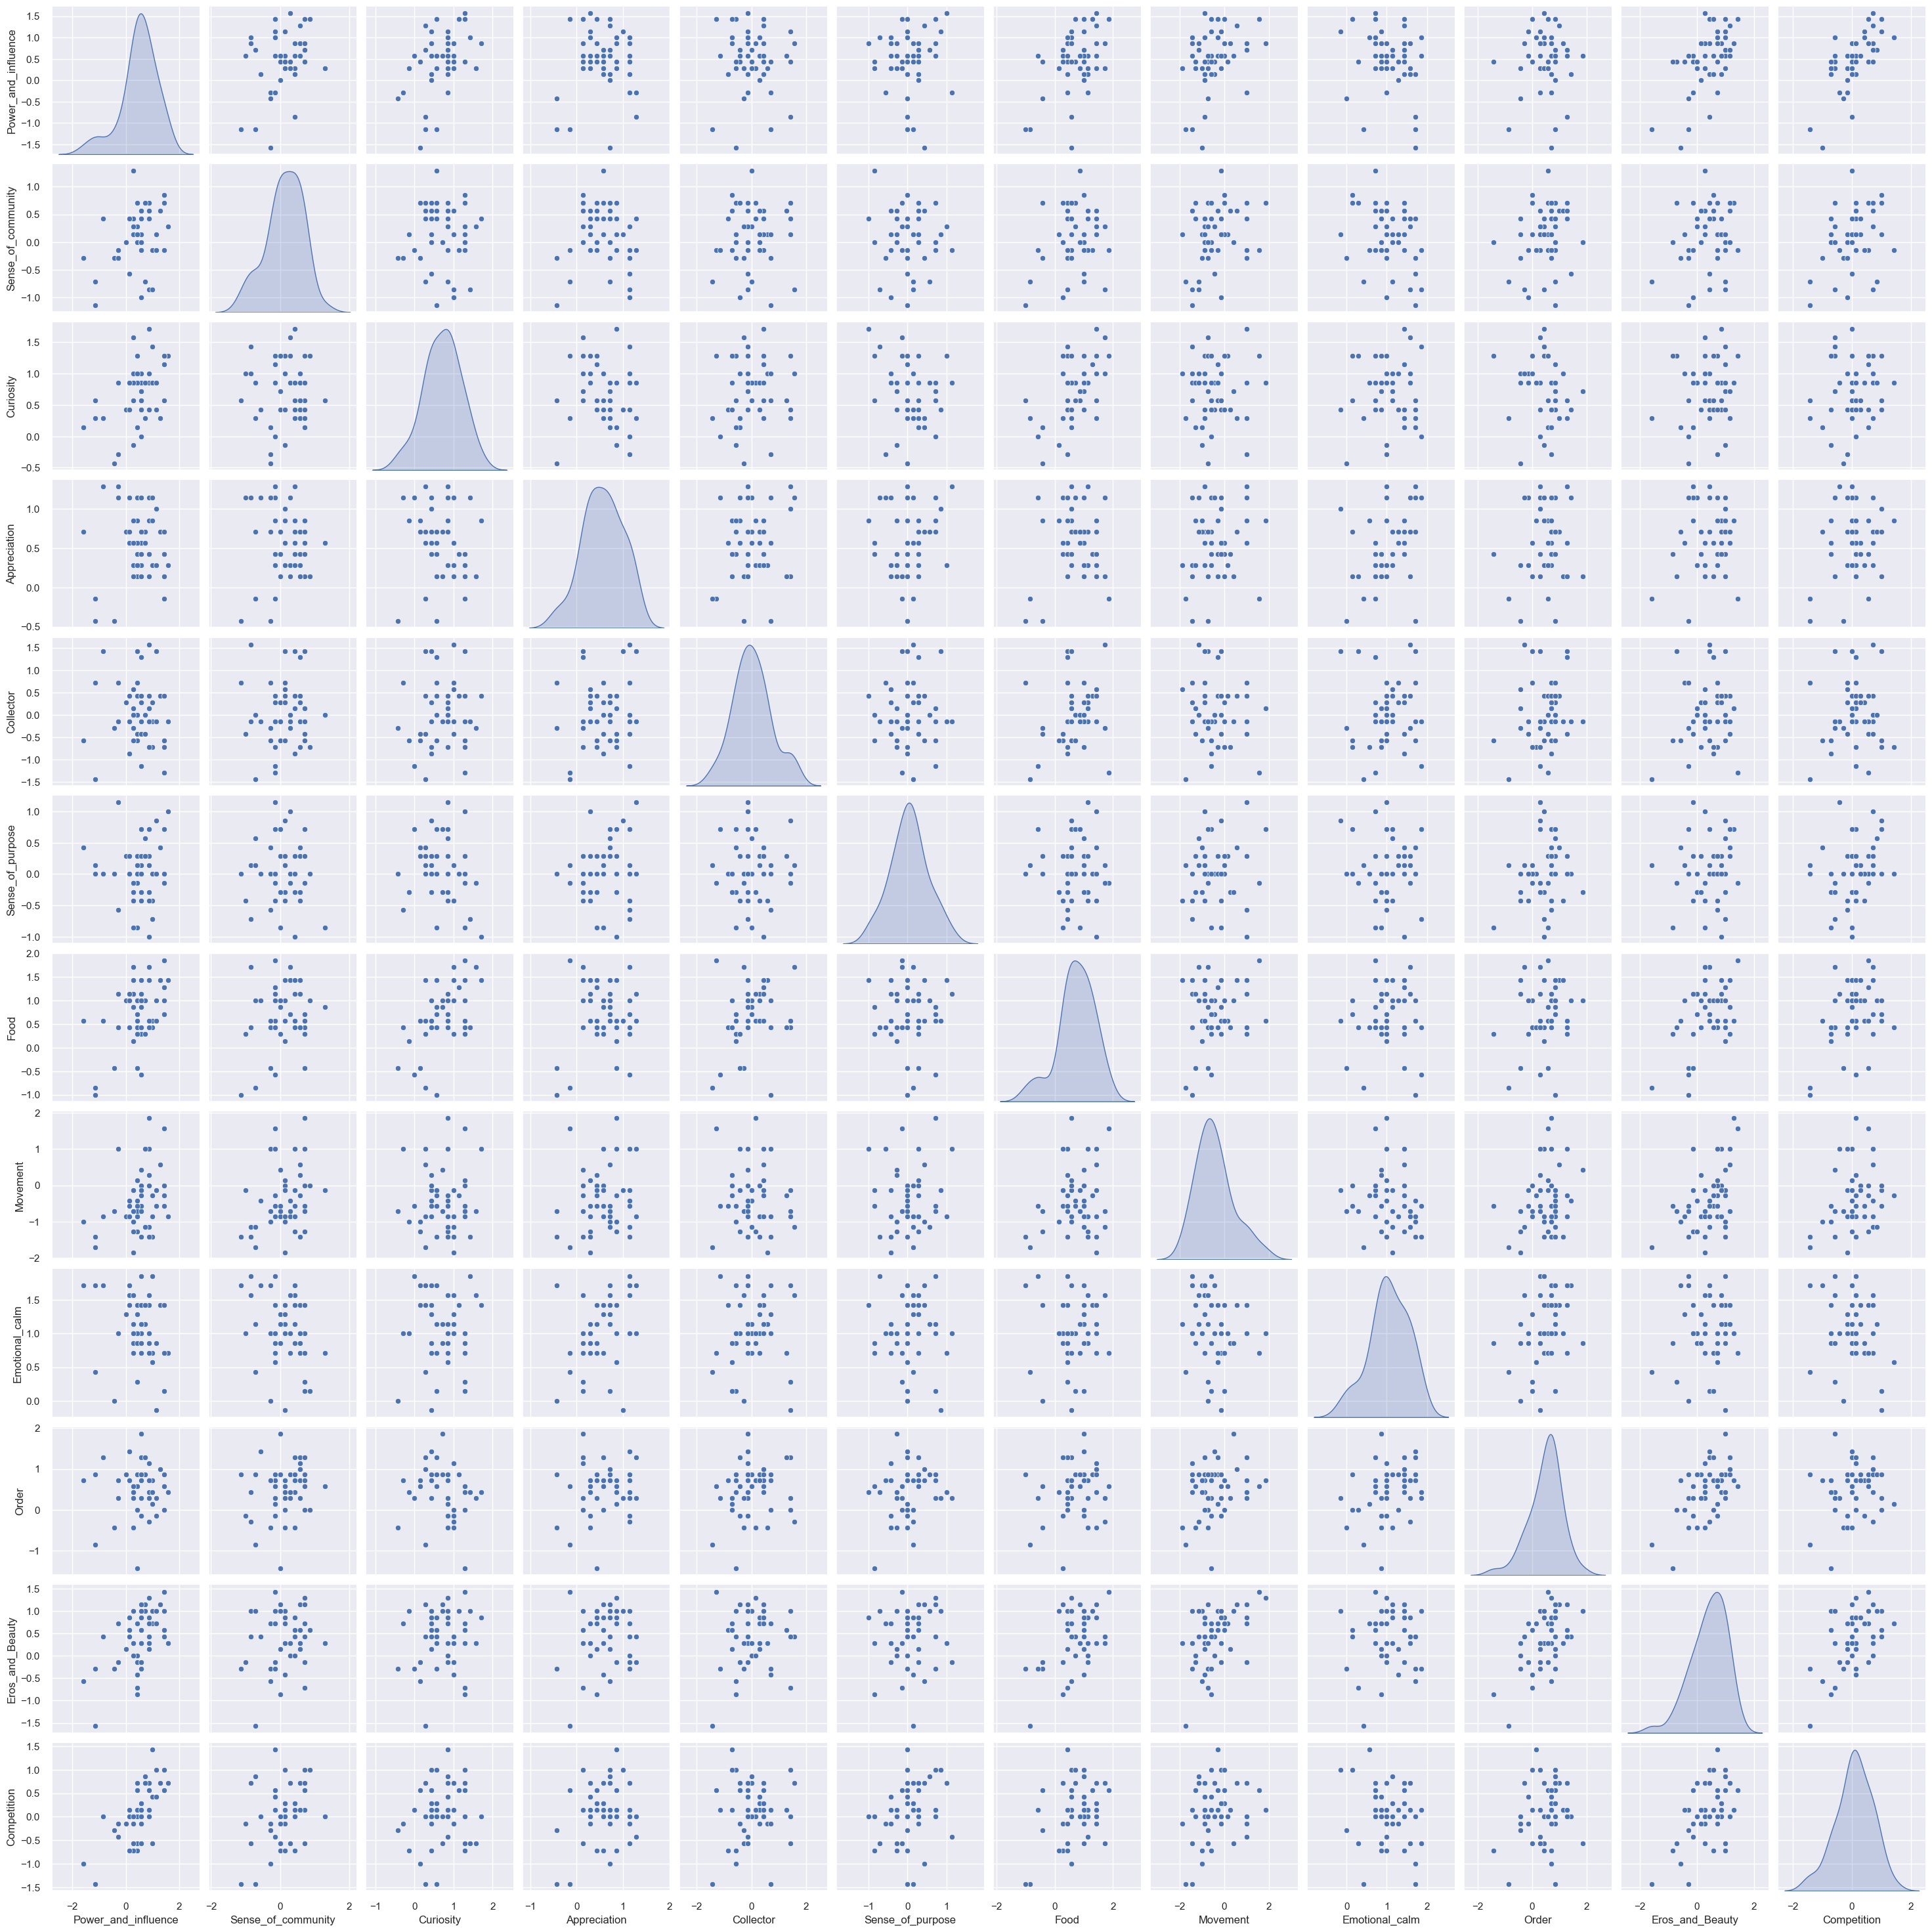

In [144]:
#pair plot
sns.pairplot(df, palette="bright", diag_kind="kde");

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

The sns.pairplot shows that there are some strong relationships between certain features that should be considered before analyzing the data. Additionally, it indicates that it's worth checking for outliers in some of the features.

</div>

In [4]:
# Select the columns for analysis
cols = [col for col in df.columns if col != 'Patient_ID']

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **Correlation analysis in the context of feature clustering**

To calculate the similarity between features, a common approach is to use correlation coefficients (in this case I use Pearson correlation) when dealing with numerical representations.
</div>

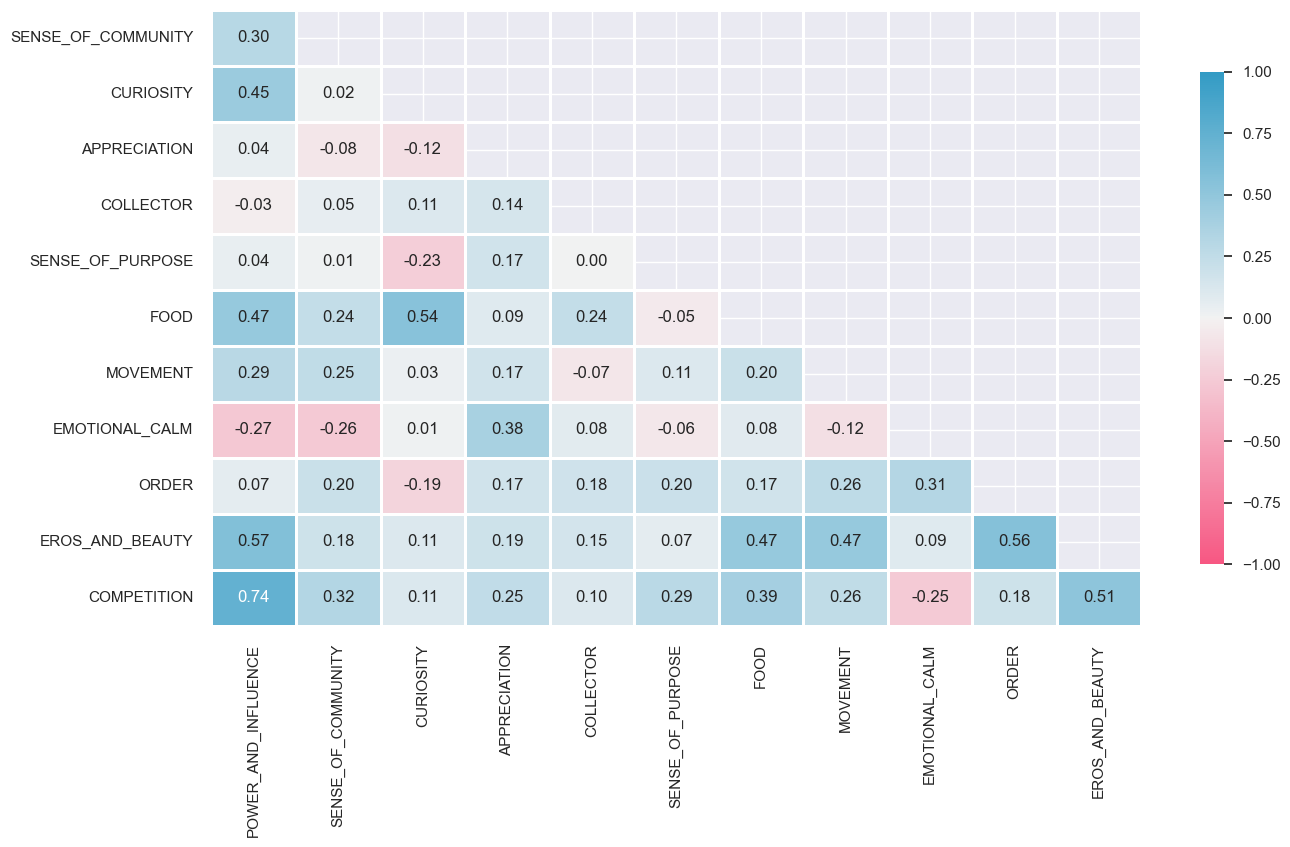

In [151]:
# Compute correlation matrix
mtx_corr = df[cols].corr()

# Create correlation heatmap plot:
fig, ax = plt.subplots(figsize=(15, 8))

# mask
mask = np.triu(np.ones_like(mtx_corr, dtype=bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = mtx_corr.iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)        # <---------- Diverging palette using "husl" color system

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           linewidths=1, cmap=cmap, vmin=-1, vmax=1,
           cbar_kws={"shrink": .8})
# , square=True)

# customize ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]

plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks);

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">
    <h2 style="font-size: 18px; margin-bottom: 12px;">High Correlations:</h2>
    <p style="font-size: 14px; margin-bottom: 8px;">Power_and_Influence and Competition <span style="color: #FF5733;">(0.74)</span></p>
    <p style="font-size: 14px; margin-bottom: 8px;">Power_and_Influence and Eros_and_Beauty <span style="color: #FF5733;">(0.57)</span></p>
    <p style="font-size: 14px; margin-bottom: 8px;">Order and Eros_and_Beauty <span style="color: #FF5733;">(0.56)</span></p>
    <p style="font-size: 14px; margin-bottom: 8px;">Curiosity and Food <span style="color: #FF5733;">(0.54)</span></p>
    <p style="font-size: 14px; margin-bottom: 8px;">Eros_and_Beauty and Competition <span style="color: #FF5733;">(0.51)</span></p>
</div>


<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **Histogram to check for outliers**

We used a histogram to visualize the data distribution more clearly and detect possible outliers.
</div>

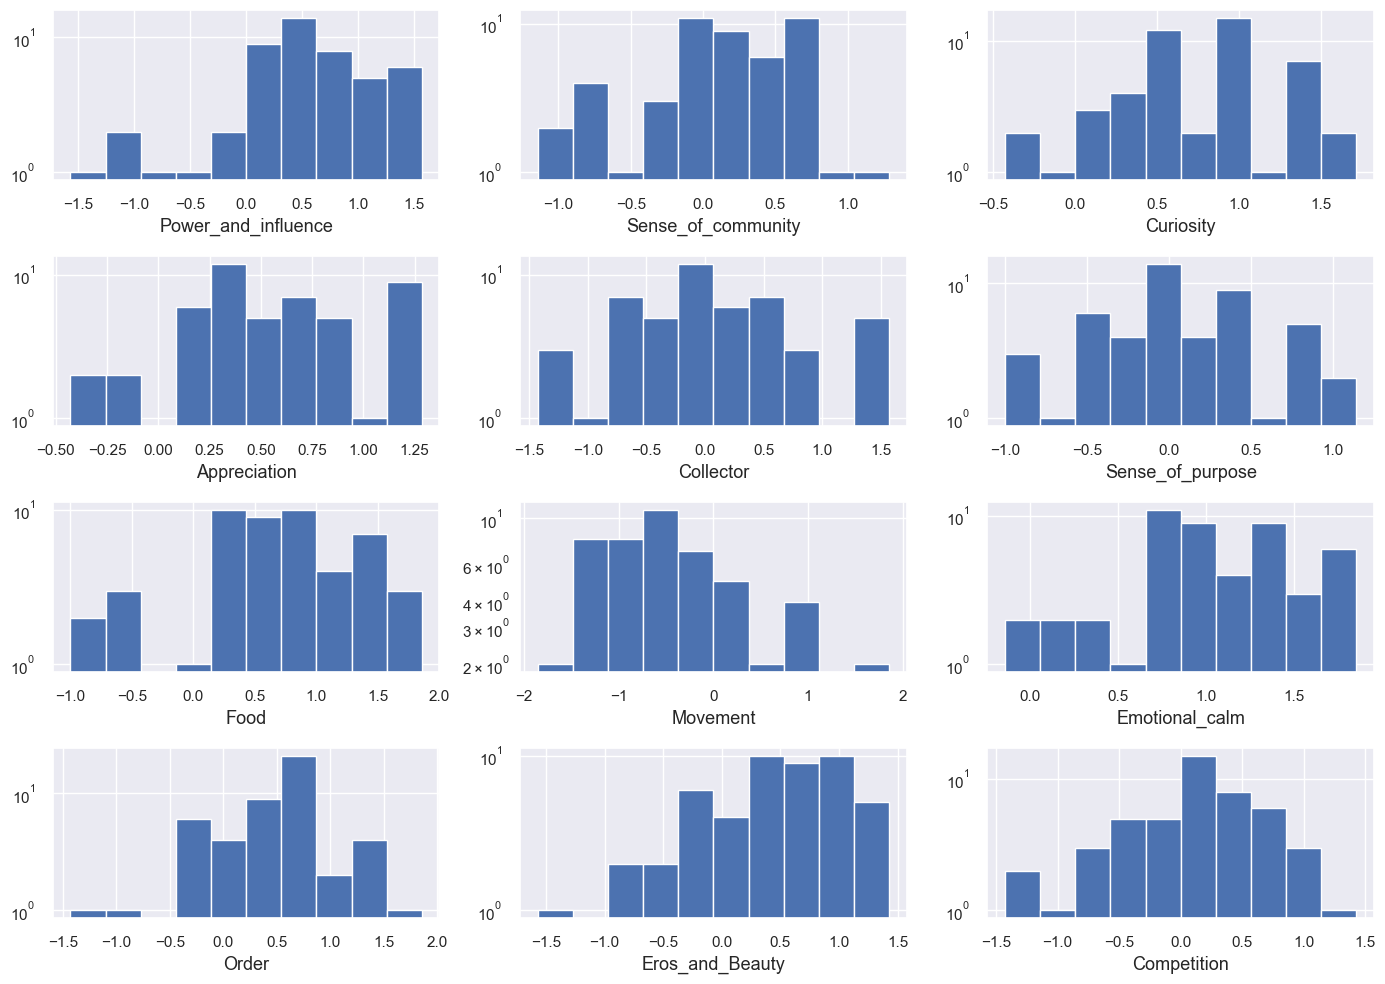

In [152]:
sns.set(style="darkgrid")

col_list = cols
fig = plt.figure(figsize=(14, 10))
grid = gridspec.GridSpec(nrows=4, ncols=3)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[0, 2])
ax4 = fig.add_subplot(grid[1, 0])
ax5 = fig.add_subplot(grid[1, 1])
ax6 = fig.add_subplot(grid[1, 2])
ax7 = fig.add_subplot(grid[2, 0])
ax8 = fig.add_subplot(grid[2, 1])
ax9 = fig.add_subplot(grid[2, 2])
ax10 = fig.add_subplot(grid[3, 0])
ax11 = fig.add_subplot(grid[3, 1])
ax12 = fig.add_subplot(grid[3, 2])

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

for j, ax in enumerate(ax_list):
    col = col_list[j]
    df[col].hist(ax=ax)
    ax.set_xlabel(col, fontsize=13)
    ax.set_yscale("log")

fig.tight_layout()
plt.show()


<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

The histogram did not clearly indicate the presence of outliers, which is why we used a QQ plot to confirm their existence in the dataset. It also did not show a strong skew in any of the features.

</div>

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **QQ plot to check for possible outliers**

</div>

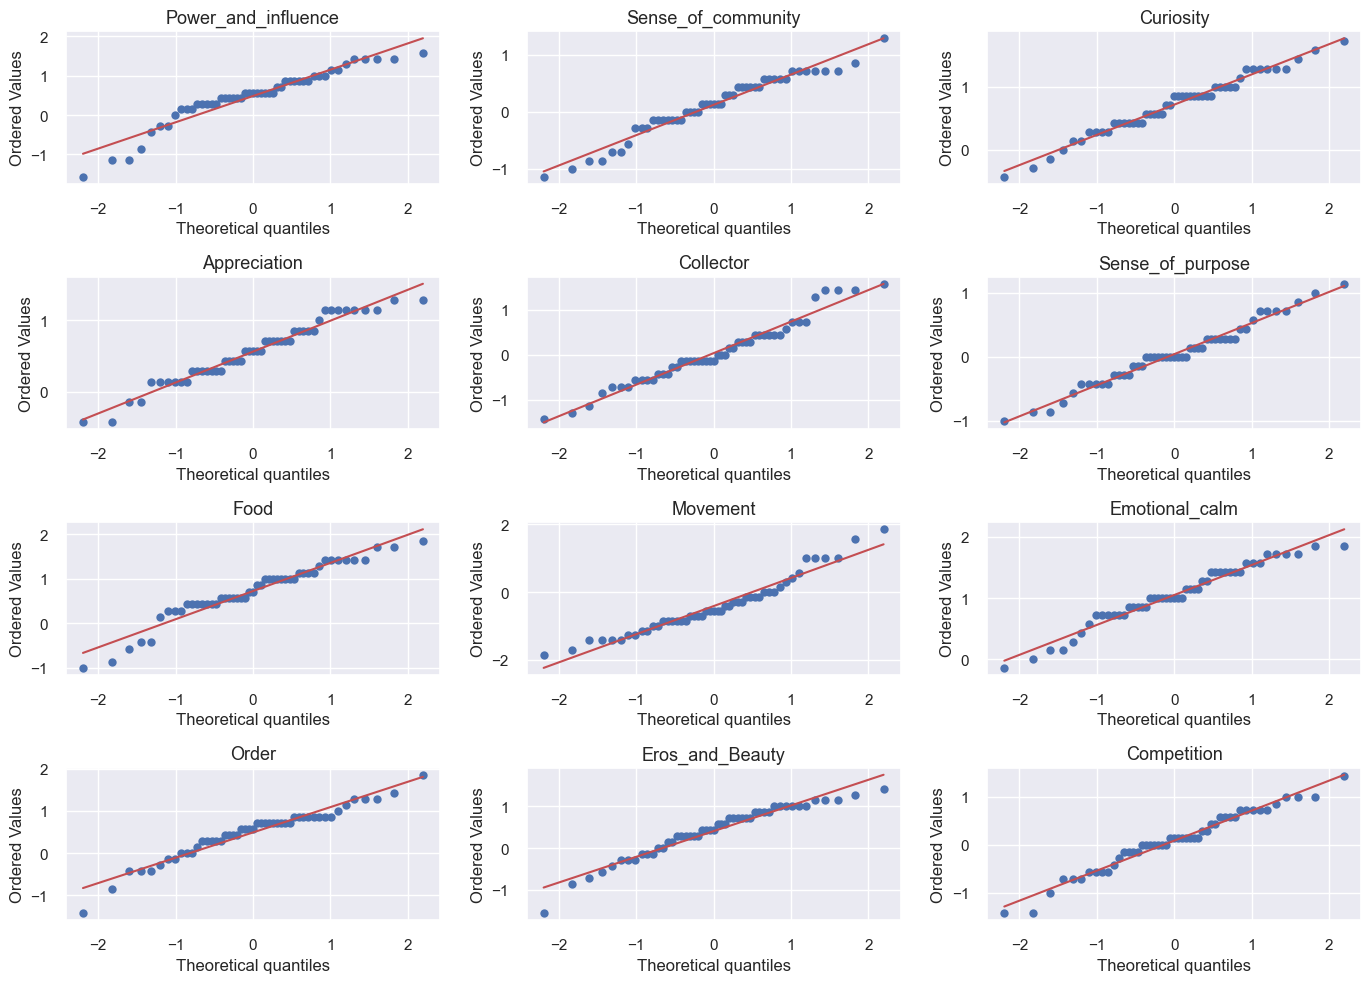

In [154]:
col_list = cols
fig = plt.figure(figsize=(14, 10))
grid = mpl.gridspec.GridSpec(nrows = 4, ncols=3)
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[0,2])
ax4 = fig.add_subplot(grid[1,0])
ax5 = fig.add_subplot(grid[1,1])
ax6 = fig.add_subplot(grid[1,2])
ax7 = fig.add_subplot(grid[2,0])
ax8 = fig.add_subplot(grid[2,1])
ax9 = fig.add_subplot(grid[2,2])
ax10 = fig.add_subplot(grid[3,0])
ax11 = fig.add_subplot(grid[3,1])
ax12 = fig.add_subplot(grid[3,2])

ax =[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for j in range(len(ax)):
    col = col_list[j]
    st.probplot(df.loc[:, col], dist ="norm", plot=ax[j])
    ax[j].set_title(col, fontsize =13)
fig.tight_layout()


<div style="ccolor:white; background-color:  #edeae5; padding: 10px;color : black">

QQ plot does not show any outlier in dataset

</div>

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

## **Preprocessing**

</div>

In [155]:
# Drop unnecesary column
X = df.copy().drop('Patient_ID', axis = 1)

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **Principal Component Analysis (PCA) in the context of Clusters Visualization**

</div>

In [156]:
# PCA
from sklearn.decomposition import PCA

# Instantiate the PCA model fixing the explained variance in a 95%
pca = PCA(n_components = 0.95)

# Fit and transform the PCA model to the scaled data
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(pca.fit_transform(X))       # df

print(pca.explained_variance_ratio_)

[0.3230767  0.14448778 0.13728311 0.09009281 0.08253112 0.06346223
 0.04734531 0.04077349 0.02722551]


<div style="ccolor:white; background-color:  #edeae5; padding: 12px;color : black">

With 9 Components I am able to explain the 95% of the variability of the original features. However, in order to visualize the clusters in a 2D space, the two Components with the highest explained variance will be selected:

Visualizing the explained variances to show how much variability of the original features explain each component:

</div>

[0.3230767  0.46756448 0.60484759 0.6949404  0.77747152 0.84093375
 0.88827906 0.92905256 0.95627807]


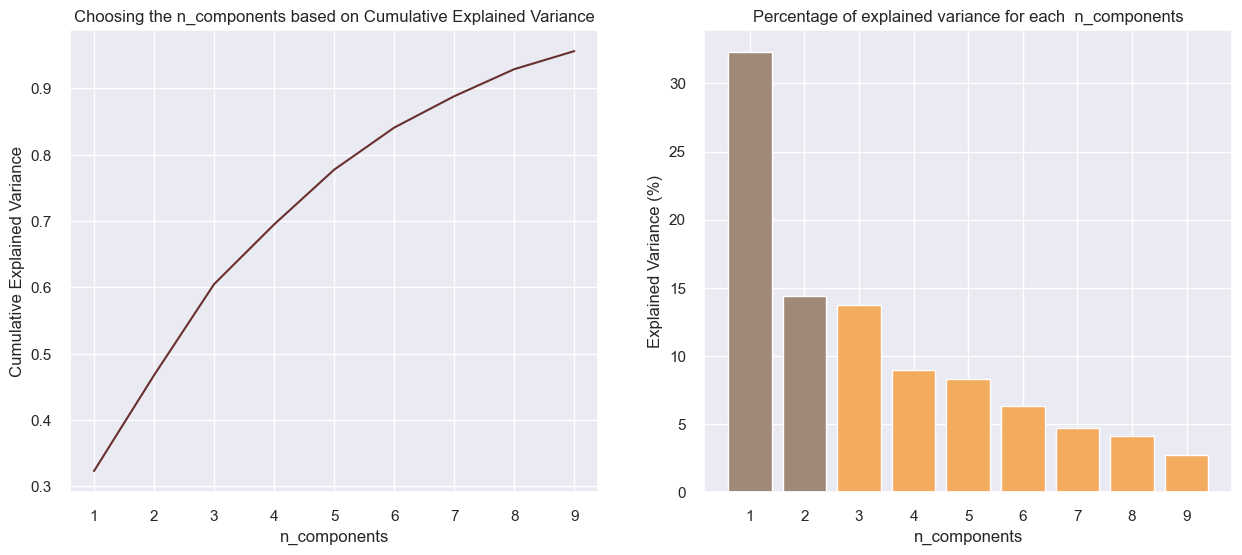

In [158]:
# Compute the Variance percentage for each Component
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

# Create a list with the index of each component
lbls = [str(x) for x in range(1,len(var)+1)]

# Create an array of the cumulative sum of the explained variances
cum_sum_expvarsratios = np.cumsum(pca.explained_variance_ratio_)
print(cum_sum_expvarsratios)

# Plots
fig, ax = plt.subplots(ncols = 2, figsize = [15,6])

# Create the line chart with the cumulative sum of the explained variance:
ax[0].plot(range(1, len(cum_sum_expvarsratios) + 1),
           cum_sum_expvarsratios, color = "#682F2F")
ax[0].set_title('Choosing the n_components based on Cumulative Explained Variance')
ax[0].set_xlabel('n_components')
ax[0].set_ylabel('Cumulative Explained Variance');

# Create the bar chart with the variance percentage of each Component:
ax[1].bar(x=range(1,len(var)+1), height = var, tick_label = lbls, color = "#F3AB60")
ax[1].set_title('Percentage of explained variance for each  n_components')
ax[1].set_xlabel('n_components')
ax[1].set_ylabel('Explained Variance (%)');

# Highlight the bars of the two first components in the bar chart
patch_h = [patch.get_height() for patch in ax[1].patches]  # <--------- list with the highest of the bars

sorted_indices = np.argsort(patch_h)                       # <--------- Get the indices of the bars sorted based on their high
idx_tallest = sorted_indices[-1]                           # <--------- Index of the tallest bar
idx_second_tallest = sorted_indices[-2]                    # <--------- Index of the second tallest bar

# Highlighting the two highest bars
ax[1].patches[idx_tallest].set_fc('#9F8A78')
ax[1].patches[idx_second_tallest].set_fc('#9F8A78')

# Step 3: Apply the Elbow Method

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

The two first components explain 46% of the variance of the original features aproximately, thus they will be used to apply the clustering technique.

</div>

In [159]:
pca_df.rename(columns={0: 'mds01'}, inplace=True)
pca_df.rename(columns={1: 'mds02'}, inplace=True)

display(pca_df[['mds01', 'mds02']])

,mds01,mds02
0,1.863189,-0.810673
1,0.832361,1.679211
2,-1.831182,-0.196498
3,-1.212991,0.676879
4,0.470959,0.216951
5,0.831118,-0.212000
6,0.190615,1.038985
7,-1.373320,-0.023224
8,-0.209621,0.052291
9,-0.850191,0.882134


<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **Multidimensional Scaling (MDS) in the context of Clusters Visualization**

</div>



In [160]:
# Compute the dissimilarity matrix for data using Euclidean distance
dissimilarity_matrix = pairwise_distances(X, metric='correlation')

display(dissimilarity_matrix)

array([[0.        , 0.60464665, 0.89933665, ..., 1.0060962 , 0.8306665 ,
        0.52591348],
       [0.60464665, 0.        , 0.61516825, ..., 1.25773165, 0.2288861 ,
        0.38139944],
       [0.89933665, 0.61516825, 0.        , ..., 0.47904646, 0.2276997 ,
        0.44554936],
       ...,
       [1.0060962 , 1.25773165, 0.47904646, ..., 0.        , 0.78399309,
        0.70829883],
       [0.8306665 , 0.2288861 , 0.2276997 , ..., 0.78399309, 0.        ,
        0.29826121],
       [0.52591348, 0.38139944, 0.44554936, ..., 0.70829883, 0.29826121,
        0.        ]])

In [18]:
# Multidimensional scaling
mds = MDS(n_components = 2, metric = True, dissimilarity='precomputed', random_state=42)

X_mds = mds.fit_transform(dissimilarity_matrix)                      # array

mds_df = pd.DataFrame(mds.fit_transform(dissimilarity_matrix))       # df

mds_df.rename(columns={0: 'mds01'}, inplace=True)
mds_df.rename(columns={1: 'mds02'}, inplace=True)
# display(X_mds)

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **Q1: It is possible to group patients according to their similarity in their answers? If so, how many groups would exist.**

</div>

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **K-Means Clustering**

</div>

Before applying K-Means, we address the disadvantages that this clustering technique has:
1. k-Means has problems with values on different scales
    - **The data consist of scores ranged in the interval $[ -2,2]$, therefore the data is already scaled.**
2. k-Means can't determine the number of clusters itself
    - **We apply the Elbow Method and Gap Statistic calculation.**

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

#### **KMeans with PCA**

</div>

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

##### *Elbow Method*

</div>

In [161]:
# Elbow function
def get_ElbowMethd(X,maxClusters):
    '''
    Apply the Elbow Method
    :param X: Data
           maxClusters :Maximum value for the number of clusters
    :return: cluster_scores: wscc scores for each k
             inertia_scores: inertia scores for each k
    '''

    cluster_scores = []
    inertia_scores = []

    for k in range(1,maxClusters):                                 # Ranging the number of clusters (k) between 1 and total of features (12)

        # Instantiate the KMeans model
        model = KMeans(n_clusters = k,
                       init = 'k-means++',             # <----- # A smarter way of placing the initial cluster centroids
                       random_state=0)

        # Fit the model to the normalized data
        model.fit(X)

        # Calculate the score (based on the WCSS distance) and add it to cluster_scores
        cluster_scores.append(model.score(X))
        inertia_scores.append(model.inertia_)

    #     Plot
    fig, ax = plt.subplots(ncols = 2, figsize = [16,6])

    ax[0].plot(list(range(1,maxClusters)),
               cluster_scores,
               marker = 'o',
               color = "#F3AB60")

    ax[0].axvline(x=3,
                  lw=1,
                  color = 'black',
                  linestyle='--')

    # ax[0].annotate(text = 'Elbow?',
    #                xy = [4,-17],
    #                xytext = [4, -15],
    #                arrowprops = dict(facecolor = 'black'))

    ax[0].set_xticks(range(2,maxClusters), labels=range(2, maxClusters))
    ax[0].set_title('Choosing the best k based on WCSS')
    ax[0].set_xlabel('k values')
    ax[0].set_ylabel('WCSS')

    ax[1].plot(list(range(1,maxClusters)),
               inertia_scores,
               marker = 'o',
               color = "#F3AB60")

    ax[1].axvline(x=3,
                  lw=1,
                  color = 'black',
                  linestyle='--')

    ax[1].set_xticks(range(2,maxClusters), labels=range(2, maxClusters))

    ax[1].set_title('Choosing the best k based on Inertia')
    ax[1].set_xlabel('k values')
    ax[1].set_ylabel('Inertia');

    plt.show()

    return cluster_scores, inertia_scores


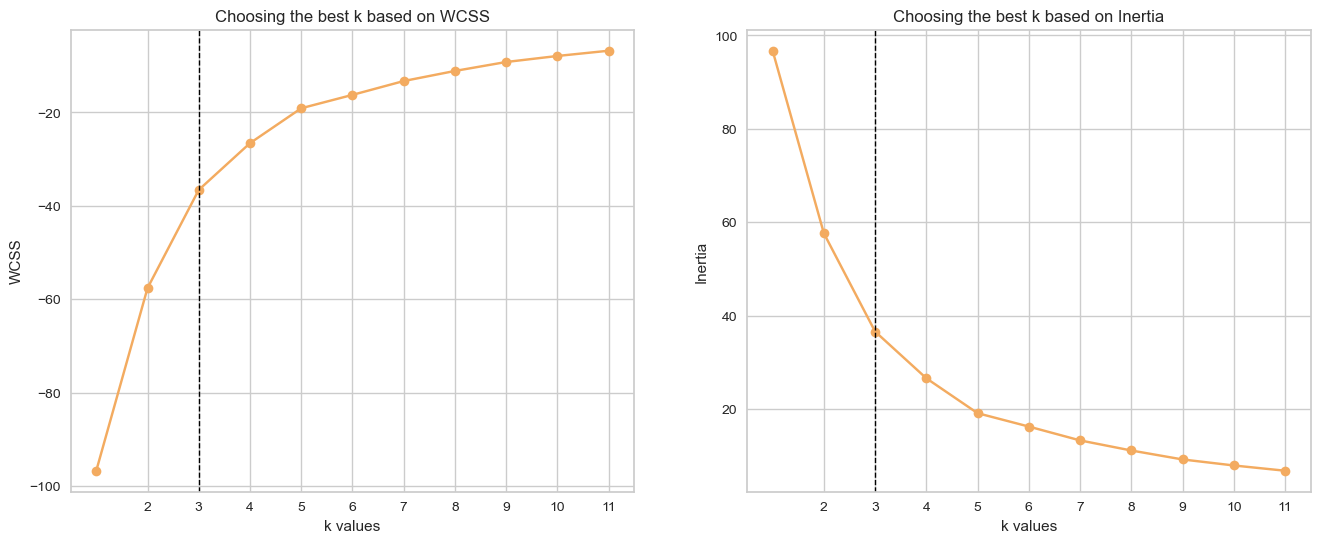

In [20]:
# PCA elbow
wcss_pca, inertia_pca = get_ElbowMethd(X_pca[:,:2], 12)

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

####  **Gap Statistic calculation**

</div>

In [21]:
# Gap stat function
# nrefs = 3
# maxClusters = 12

def gap_statmethod(X,nrefs,maxClusters):
    '''
    Calculates the Gap statistic for a clustering technique
    :param: X: dataset
            nref: number of sample reference datasets to create (B)
            maxClusters: maximum number of clusters to test
    :return: gap_stats: Gap statistics for each k value
             k_opt: optimal number of clusters
    '''
    # Define an array for the gap statistic values for each k
    gaps = np.zeros((len(range(2, maxClusters)),))

    gaps2 = []

    # Define dataframe with results
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[], 'refDisps': [], 'origDisp': []})

    for gap_index, k in enumerate(range(2, maxClusters)):
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):

            # Create new random reference set
            randomReference = np.random.random_sample(size=X.shape)

            # Fit to reference set
            model = KMeans(n_clusters = k,
                           init = 'k-means++',
                           random_state = 0)
            model.fit(randomReference)
            refDisp = model.inertia_
            refDisps[i] = refDisp

        # Fit model to original data and compute dispersion
        model = KMeans(n_clusters = k,
                       init = 'k-means++',
                       random_state = 0)
        model.fit(X)
        origDisp = model.inertia_

        # Calculate gap statistic
        # gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gap = np.mean(np.log(refDisps)) - np.log(np.mean(origDisp))

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap

        # Adding the Gap Statistic values in a list gaps2:
        gaps2.append(gap)

        new_row = pd.DataFrame({'clusterCount': [k],
                                'gap': [gap],
                                'refDisps': [np.mean(refDisps)],
                                'origDisp': [origDisp]})

        # Dataframe with the wcss for the original data, wcss for the reference data and the gap statistic:
        resultsdf = pd.concat([resultsdf, new_row], ignore_index=True)

    # Find optimal number of clusters based on Gap Statistic
    optimal_k = np.argmax(gaps2) + 2
    # print("Optimal number of clusters:", optimal_k)

    # Plots
    fig, ax = plt.subplots(ncols = 2, figsize = [16,5])

    ax[0].plot(resultsdf['clusterCount'], resultsdf['origDisp'], marker = 's', color = "#9F8A78", label = 'Drawn from Data')
    ax[0].plot(resultsdf['clusterCount'], resultsdf['refDisps'], marker = 's', color = "#B9C0C9", label = 'Simulated')
    ax[0].set(title = 'Decrease of Within Cluster Sum-Square',
              xlabel = 'k values')

    ax[1].plot(resultsdf['clusterCount'], resultsdf['gap'], marker='o', label= 'Gap Statistic', color = "#F3AB60")
    ax[1].set_xticks(range(2,12), labels=range(2, 12))
    ax[1].axvline(x=3,
                  lw=1,
                  color = 'black',
                  linestyle='--')

    ax[1].set(title = 'Gap statistics values',
              xlabel = 'k values')

    ax[1].legend()

    plt.show()

    return (gaps2, resultsdf)

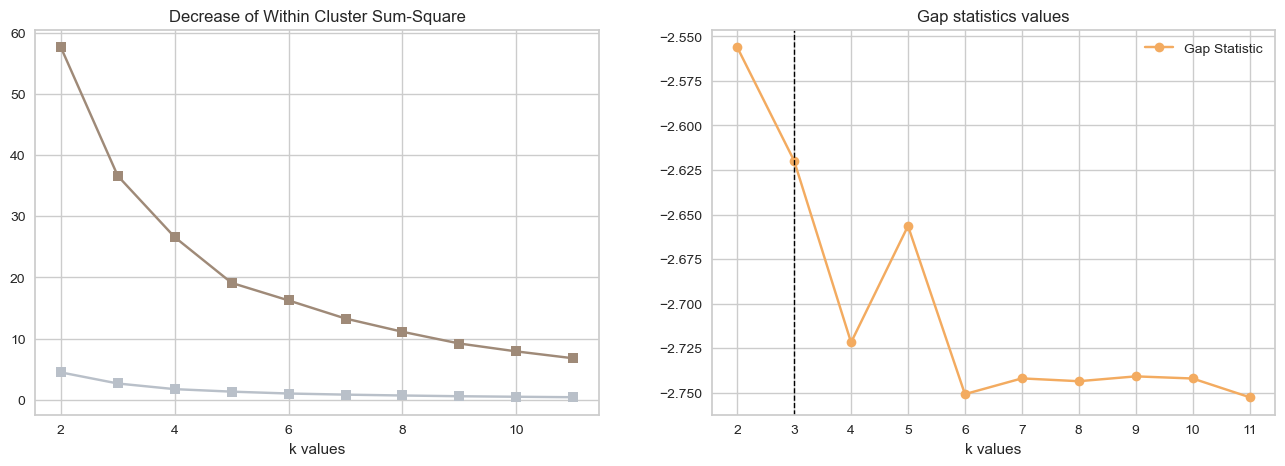

In [22]:
gaps2, gap_df = gap_statmethod(X_pca[:,:2], nrefs=100, maxClusters=12)

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

- **Elbow Method**: 3 Clusters suggested
- **Gap Statistic Method**: 3 Clusters suggested

---

According to these observations, its possible to define $\mathbf{k = 3}$ as the optimal number of clusters in the data.

</div>


<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **Fit the final KMeans model**:

</div>

In [23]:
# Final KMeans model with 3 clusters

kmeans_pca = KMeans(n_clusters = 3,
                    init = 'k-means++',
                    max_iter=100000, 
                    n_init = 10,
                    random_state = 42)

clusters_pca = kmeans_pca.fit_predict(X_pca[:,:2])

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

Adding a column called Labels to the original dataset:

</div>


In [24]:
# The labels of each cluster
X['Labels'] = kmeans_pca.labels_                     # The order of the labels in the same as that of the customer numbers

df_pca = X.copy()
df_pca['Labels'] = kmeans_pca.labels_

# Table with the counts of the number of times each label occurs
tabla = pd.crosstab(index = kmeans_pca.labels_,
                    columns = 'counts')
print(kmeans_pca.cluster_centers_)

display(tabla)

[[-0.81943156 -0.34418443]
 [ 1.64626771 -0.55783772]
 [ 0.14901555  0.84341369]]


col_0,counts
row_0,
0,23
1,10
2,16


<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

Visualization of Clusters

</div>


In [25]:
tech_list = ['PCA', 'MDS']

def vis_clusters(model, X, tech):
    '''
    Function that plots the scatter plot with the clusters in two variantes:
        Plot 1: Clusters with lines between data points and centroids, and
        Plot 2: Clusters with their convex hull
    :param model: kmeans_pca or kmeans_mds
    :param X: dataset with the dimensionality reduction technique
    :param tech: 'PCA' or 'MDS'
    :return:
    '''
# ---------------------------------------------------------------------
#   Creating the clustering matrix
    clusters_matrix = pd.DataFrame()
    clusters_matrix["cluster"] = model.fit_predict(X)

    # get centroids
    centroids = model.cluster_centers_
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]

    ## add centroids to clusters_matrix
    clusters_matrix['cen_x'] = clusters_matrix.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    clusters_matrix['cen_y'] = clusters_matrix.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    clusters_matrix['mds_01'] =X.mds01       # for convex region of each cluster
    clusters_matrix['mds_02'] =X.mds02       # for convex region of each cluster

# ---------------------------------------------------------------------
    # define and map colors
    colors = ["#682F2F", "#69884c","#F3AB60"]
    clusters_matrix['c'] = clusters_matrix.cluster.map({0:colors[0], 1:colors[1], 2:colors[2] })
# ---------------------------------------------------------------------
#   Plot 1:

    plt.scatter(X.mds01,
                X.mds02,
                c = clusters_matrix.c,
                cmap='viridis',
                alpha = 0.6)

    plt.scatter(cen_x,
                cen_y,
                marker='^',
                c=colors,
                s=70)

    # plot lines
    for idx, val in clusters_matrix.iterrows():

        x = [val.mds_01, val.cen_x,]
        y = [val.mds_02, val.cen_y]

        plt.plot(x,
                 y,
                 c=val.c,
                 alpha=0.2)

    legend_elements = [Line2D([0],                              # <--- x-coordenate for the marker position
                              [0],                              # <--- y-coordenate for the marker position
                              marker='o',                       # <--- the marker style, in this case a circle. Other markers: square 's', triangle '^', cross 'x', etc
                              color='w',                        # <--- the color of the marker's edge, in this case is white
                              label='Cluster {}'.format(i),   # <--- the label for the legend element, based on the loop index 'i'
                              markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]       # <--- the fill color of the marker, i.e., the color inside the circle
    # <--- markersize = 5 set the size of the marker (circle) to 5 points
    # <--- the list comprehension iterates over the 'colors' list (which contains the colors of the clusters)

    # plot customization
    plt.grid(False)
    plt.title('Clustering based on {}'.format(tech))
    plt.xlabel('{} Component 1'.format(tech))
    plt.ylabel('{} Component 2'.format(tech))
    # Legend
    plt.legend(handles=legend_elements, loc='upper left')

    plt.show()

# ---------------------------------------------------------------------
#   Plot 2:

    plt.scatter(X.mds01,
                X.mds02,
                c = clusters_matrix.c,
                cmap='viridis',
                alpha = 0.6)

    plt.scatter(cen_x,
                cen_y,
                marker='^',
                c = colors,
                s = 70)

    # draw enclosure
    for i in clusters_matrix.cluster.unique():

        points = clusters_matrix[clusters_matrix.cluster == i][['mds_01', 'mds_02']].values

        # get convex hull
        hull = ConvexHull(points)

        # get x and y coordinates (repeat last point to close the polygon)
        x_hull = np.append(points[hull.vertices,0],
                           points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                           points[hull.vertices,1][0])

        # plot shape
        plt.fill(x_hull,
                 y_hull,
                 alpha = 0.3,
                 c = colors[i])

    # plot customization
    plt.grid(False)
    plt.title('KMeans + {} Clustering visualization'.format(tech))
    plt.xlabel('{} Component 1'.format(tech))
    plt.ylabel('{} Component 2'.format(tech))
    # plot legend
    plt.legend(handles=legend_elements, loc='upper left')

    plt.show()

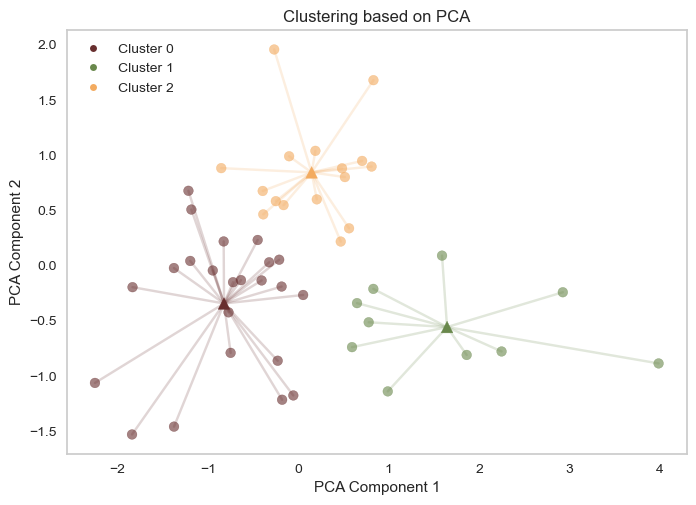

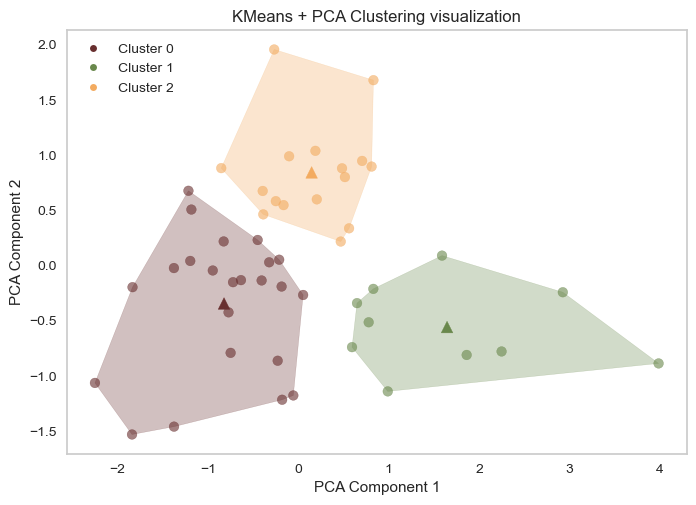

In [26]:
vis_clusters(kmeans_pca,pca_df[['mds01', 'mds02']], tech_list[0])

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **KMeans with MDS**

</div>


<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

#### *Elbow Method*

</div>

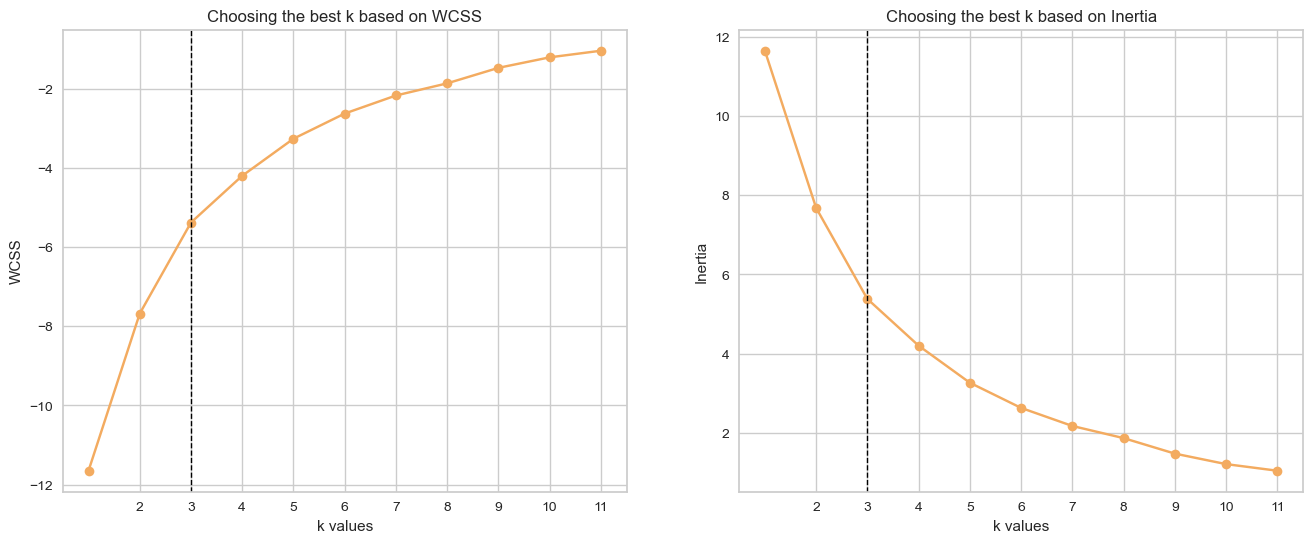

In [27]:
wcss_mds, inertia_mds = get_ElbowMethd(X_mds, 12)

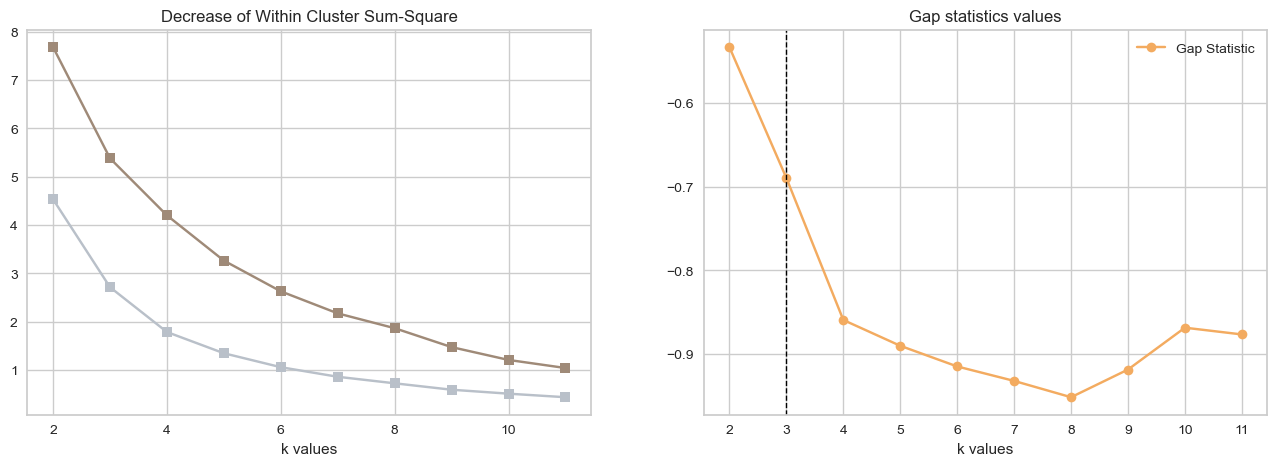

In [28]:
score_g, gap_df = gap_statmethod(X_mds, nrefs=100, maxClusters=12)

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

#### **Gap Statistic calculation**

</div>

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

- **Elbow Method**: 3 Clusters suggested

- **Gap Statistic Method**: 3 Clusters suggested
---

We define $\mathbf{k = 3}$ as the optimal number of clusters in the data.

</div>

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **Fit the final KMeans model**:

</div>

In [29]:
k = 3         # <----- the number of clusters I choose

kmeans_mds = KMeans(n_clusters = k,
                    init = 'k-means++',
                    max_iter=100000,
                    n_init = 10,
                    random_state = 42)


clusters_mds = kmeans_mds.fit_predict(X_mds)

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

Adding the column Labels to the original dataset:

</div>



In [30]:
# The labels of each cluster
df_mds = X.copy()
df_mds['Labels'] = kmeans_mds.labels_                     # The order of the labels in the same as that of the customer numbers

# Table with the counts of the number of times each label occurs
tabla = pd.crosstab(index = kmeans_mds.labels_,
                    columns = 'counts')
print(kmeans_mds.cluster_centers_)

display(tabla)

[[ 0.34483183 -0.16085877]
 [-0.19838343 -0.18802448]
 [-0.00845559  0.44483591]]


col_0,counts
row_0,
0,13
1,22
2,14


<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

#### **Visualization of Clusters**

</div>

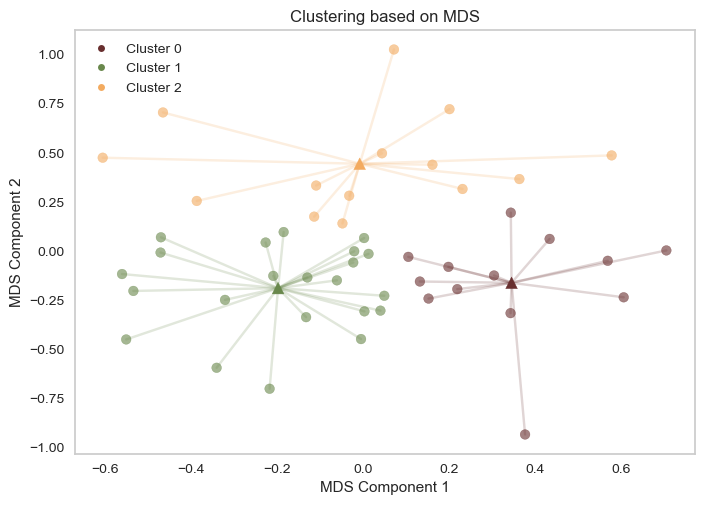

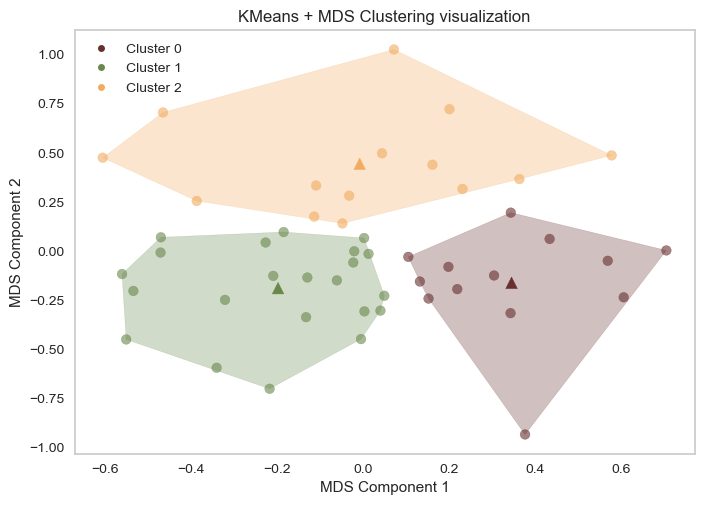

In [31]:
vis_clusters(kmeans_mds, mds_df, tech_list[1])

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

## **Comparison of  Clustering results**

We compare the average silhouette score between the clusters found by KMeans with PCA and with MDS:
</div>



In [32]:
silhpca_score = silhouette_score(X_pca[:,:2], clusters_pca)

print(f'Silhouette score in clusters found by KMeans with PCA: {silhpca_score:.3f}')

print('--------------------------------------------------------------------------------')

silhmds_score = silhouette_score(X_mds, clusters_mds)

print(f'Silhouette score in clusters found by KMeans with MDS: {silhmds_score:.3f}')

Silhouette score in clusters found by KMeans with PCA: 0.366
--------------------------------------------------------------------------------
Silhouette score in clusters found by KMeans with MDS: 0.293


<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

Although both Silhouette scores are not particularly high, the data points in the clusters created with **KMeans + PCA** seem to have been better allocated than with KMeans + MDS.

</div>

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **Cluster evaluation**

We investigate unusual data points or examine the quality of individual clusters:
</div>

In [33]:

# KMean with PCA
print('KMeans with PCA')
print('------------------------------------------------------------------------')
# create an array with a silhouette score for each datapoint
X_pca_sill = silhouette_samples(X_pca[:,:2], kmeans_pca.labels_)

print('Minimum silhouette score {}'.format(np.min(X_pca_sill)))

# The Cluster corresponding the minimum silhouette score:
print('Cluster {} contains the minimum silhouette score.'.format(kmeans_pca.labels_[X_pca_sill == np.min(X_pca_sill)]))

# Create a df with the patient ID and its corresponding clusters labels
X_pca_df = pd.DataFrame(df['Patient_ID'],
                         columns = ['Patient_ID'])
X_pca_df['Labels'] = kmeans_pca.labels_

# The patient with the minimum silhouette score
print('The patient ID with the minimum silhouette score is {}'.format(X_pca_df.loc[X_pca_sill == np.min(X_pca_sill), 'Patient_ID'].iloc[0]))

# ===============================================================================
# KMean with MDS
print('\n')
print('KMeans with MDS')
print('------------------------------------------------------------------------')
# create an array with a silhouette score for each datapoint
X_mds_sill = silhouette_samples(X_mds, kmeans_mds.labels_)

print('Minimum silhouette score {}'.format(np.min(X_mds_sill)))

# The Cluster corresponding the minimum silhouette score:
print('Cluster {} contains the minimum silhouette score.'.format(kmeans_mds.labels_[X_mds_sill == np.min(X_mds_sill)]))

# Create a df with the patient ID and its corresponding clusters labels
X_mds_df = pd.DataFrame(df['Patient_ID'],
                        columns = ['Patient_ID'])
X_mds_df['Labels'] = kmeans_mds.labels_

# The patient with the minimum silhouette score
print('The patient ID with the minimum silhouette score is {}'.format(X_mds_df.loc[X_mds_sill == np.min(X_mds_sill), 'Patient_ID'].iloc[0]))

KMeans with PCA
------------------------------------------------------------------------
Minimum silhouette score 0.016611444179878962
Cluster [0] contains the minimum silhouette score.
The patient ID with the minimum silhouette score is P40


KMeans with MDS
------------------------------------------------------------------------
Minimum silhouette score -0.08508990444697846
Cluster [2] contains the minimum silhouette score.
The patient ID with the minimum silhouette score is P32


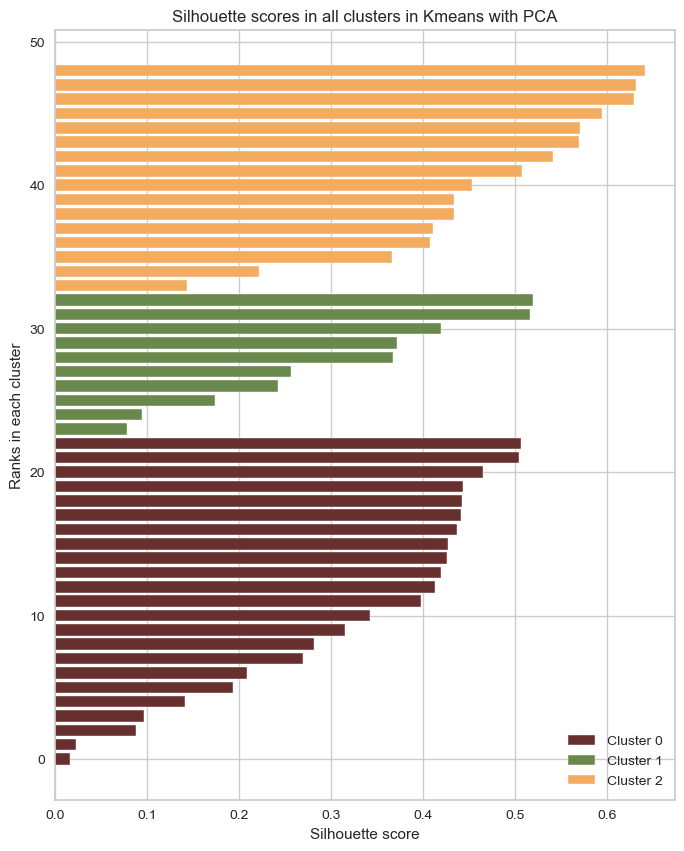

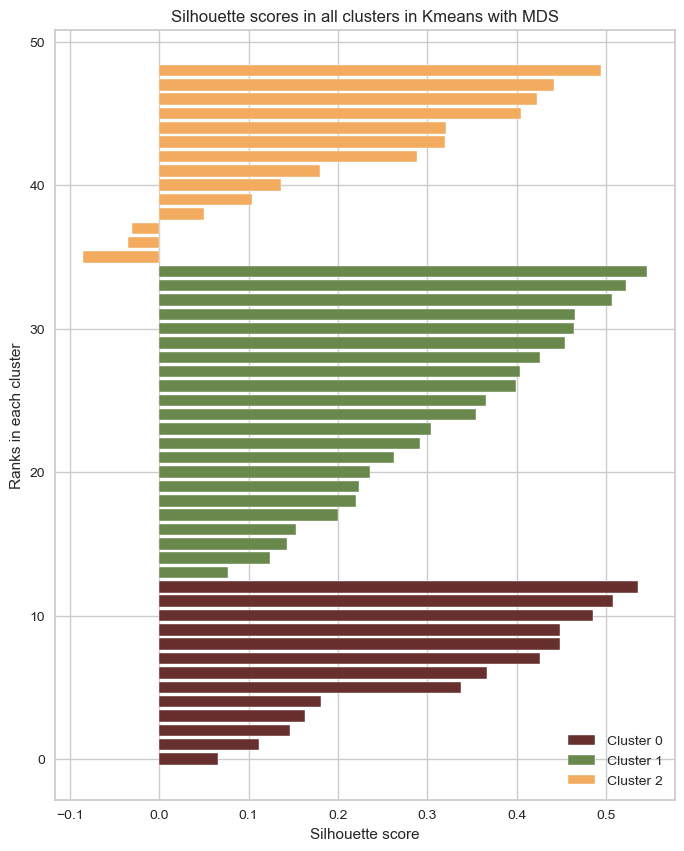

In [34]:
def sillplot(X_arr_sill,model,n_clusters,tech):
    '''
    Plot the sillhouette scores for each cluster
    :param X_arr: Array with the data points
    :param model: clustering model used
    :param n_clusters: number of clusters used in 'model'
    :return: plot
    '''

    fig, ax = plt.subplots(figsize = [8,10])
    start = 0
    end = 0

    colors = ["#682F2F", "#69884c","#F3AB60"]

    for i in range(n_clusters):

        mask = model.labels_ == i
        sv_sorted = np.sort(X_arr_sill[mask])
        sv_len = len(sv_sorted)
        end = end + sv_len

        ax.barh(np.arange(start, end),
                sv_sorted,
                color = colors[i],
                label = f'Cluster {i}')

        start = end

        ax.legend()
        ax.set_title('Silhouette scores in all clusters in Kmeans with {}'.format(tech))
        ax.set_xlabel('Silhouette score')
        ax.set_ylabel('Ranks in each cluster')

# ---------------------------------------------------------------------------------------------------------------------
tech_list = ['PCA', 'MDS']
# Silhouette scores for KMeans with PCA
sillplot(X_pca_sill,kmeans_pca,3,tech_list[0])

# Silhouette scores for KMeans with MDS'
sillplot(X_mds_sill,kmeans_mds,3,tech_list[1])

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

Conclusions:

- (**KMeans with PCA**): None of the 3 clusters have negative scores. This means that every data point form a relatively compact cluster.
- (**KMeans with MDS**): Clusters 2 contain data points with a negative silhouette score.

---
We continue with:

**KMeans with PCA with 3 Clusters**
</div>

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

### **Q2: It is possible to group motivations?**

We apply **feature clustering** to the motivations:
</div>



In [162]:
# Transpose the dataset before applying the clustering technique to the Features
df_T = df.T

# Delete the row with the patients Ids
df_T.drop('Patient_ID', inplace = True)
df_T.index

Index(['Power_and_influence', 'Sense_of_community', 'Curiosity', 'Appreciation', 'Collector', 'Sense_of_purpose', 'Food', 'Movement', 'Emotional_calm', 'Order', 'Eros_and_Beauty', 'Competition'], dtype='object')

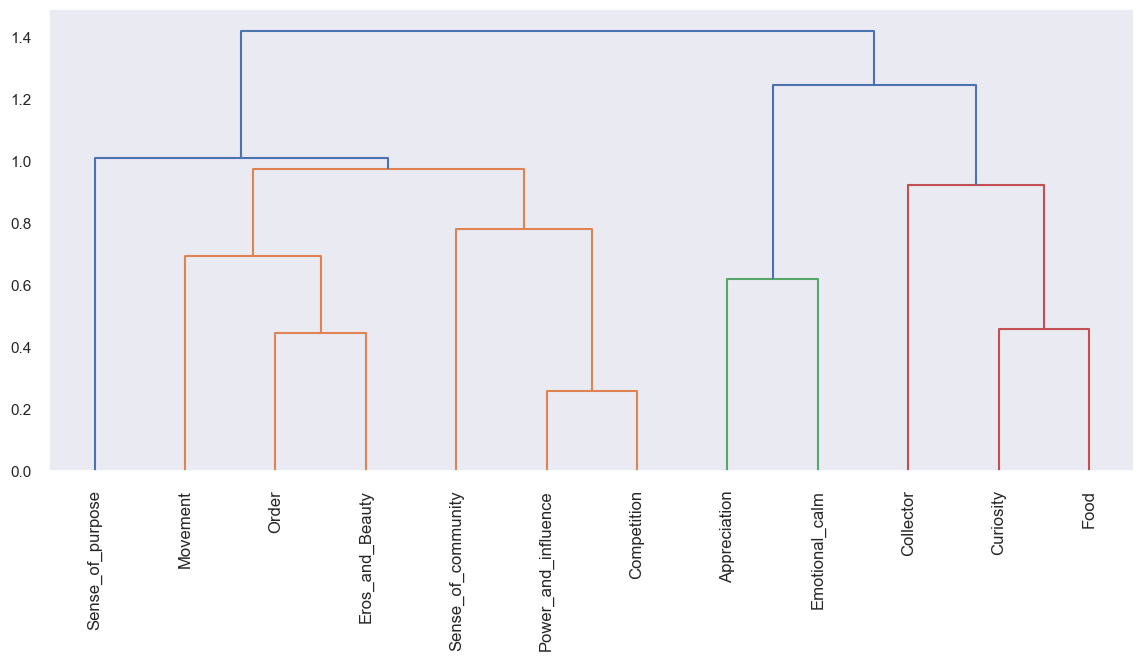

In [163]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the Correlation-based distances between each pair of features
dist_feat = pdist(df_T, metric='correlation')

# Perform hierarchical clustering to compute the linkage matrix
linkage_matrix = linkage(dist_feat, 'ward')

# Create the dendrogram
plt.figure(figsize=(14, 6))
plt.grid(False)
dendrogram(linkage_matrix,
           labels = df[cols].columns,
           leaf_rotation=90,
           leaf_font_size=12);

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

**Group 1**: Power_and_influence, Competition, Sense_of_community, Eros_and_Beauty, Order, Movement

**Group 2**: Collector, Curiosity, Food

**Group 3**: Appreciation, Emotional_calm

**Group 4**: Sense_of_purpose

</div>

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

## **Clusters Classification based on the feature clustering results**

</div>

In [37]:
df_pca['Patient_ID'] = df['Patient_ID']

cluster0_stats = df_pca.loc[df_pca['Labels'] == 0, :].drop('Labels', axis = 1).describe()

cluster1_stats = df_pca.loc[df_pca['Labels'] == 1, :].drop('Labels', axis = 1).describe()

cluster2_stats = df_pca.loc[df_pca['Labels'] == 2, :].drop('Labels', axis = 1).describe()

display(df_pca.head())

,Power_and_influence,Sense_of_community,Curiosity,Appreciation,Collector,Sense_of_purpose,Food,Movement,Emotional_calm,Order,Eros_and_Beauty,Competition,Labels,Patient_ID
0,-0.428571,-0.285714,-0.428571,-0.428571,-0.285714,0.000000,-0.428571,-0.714286,0.000000,-0.428571,-0.285714,-0.285714,1,P1
1,0.285714,0.142857,1.000000,0.285714,0.571429,-0.428571,1.428571,-1.857143,1.142857,-0.428571,0.285714,-0.142857,2,P2
2,1.285714,0.571429,0.285714,0.714286,0.428571,0.428571,1.428571,0.571429,1.428571,1.000000,1.142857,0.714286,0,P3
3,1.428571,-0.142857,1.142857,0.428571,0.428571,0.000000,1.285714,-0.285714,1.428571,0.857143,1.000000,0.571429,0,P4
4,0.000000,0.000000,0.428571,0.714286,0.285714,0.285714,1.000000,-0.857143,1.285714,0.857143,0.142857,-0.142857,2,P5


In [136]:
def clusters_evaluation(X,group):
    '''
    Function that create a box plot for each cluster with the scores that each data point gives for each Motivation in "group"
    :param X: Dataset
    :param group: group list of Motivations
    :return: array with the boxplots for each Motivation
    '''

    cluster0_group = X.loc[X['Labels'] == 0, :].drop('Labels', axis = 1)[group]

    cluster1_group = X.loc[X['Labels'] == 1, :].drop('Labels', axis = 1)[group]

    cluster2_group = X.loc[X['Labels'] == 2, :].drop('Labels', axis = 1)[group]

    combined_df = pd.concat([cluster0_group, cluster1_group, cluster2_group], keys=['Cluster 0', 'Cluster 1', 'Cluster 2'])

    clusters_list = ['Cluster 0', 'Cluster 1', 'Cluster 2']
    # --------------------------------------------------------------------------------

    # "#9F8A78": carmelita

    # Define a custom color palette (replace with your preferred colors)
    colors1 = ["#682F2F", "#69884c","#F3AB60"]
    colors2 = ['#9F8A78','#2d5c6c', '#4e6c5c']

    plt.figure(figsize=(8,4))

    for i, col in enumerate(group):
        plt.subplot(1, len(group), i+1)

        vio = sns.violinplot(x = combined_df.index.get_level_values(0),
                             y = col,
                             data = combined_df,
                             palette = colors1)

        plt.setp(vio.collections, alpha=.5)       # <------ set the transparency of the violinplots

        sns.boxenplot(x = combined_df.index.get_level_values(0),
                    y = col,
                    data = combined_df,
                    palette = colors1,
                    width=0.3
                    # palette = 'vlag'
                    )

        plt.hlines(y=combined_df[col].median(), xmin=-1, xmax=3, colors="black", linestyles="dashed")
        plt.grid(False)
        plt.xlabel('Cluster')
        plt.ylabel('{}'.format(col))
        if len(group) == 6:
            plt.xticks(rotation=60)
    name = str(group)
    # Show all subplots together
    plt.tight_layout()
    plt.savefig(name, dpi=300)
    plt.show()

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

#### Group 1: **Power_and_influence, Competition, Sense_of_community, Eros_and_Beauty, Order, Movement**

</div>

In [116]:
group1_list = ['Power_and_influence', 'Competition', 'Sense_of_community', 'Eros_and_Beauty', 'Order', 'Movement']

print('Patients in Cluster 0:')
cluster0_stats_group1 = cluster0_stats[[ 'Power_and_influence', 'Competition', 'Sense_of_community', 'Eros_and_Beauty', 'Order', 'Movement']]
display(cluster0_stats_group1)
print('--------------------------------------------------------------')

print('Patients in Cluster 1:')
cluster1_stats_group1 = cluster1_stats[['Power_and_influence', 'Competition', 'Sense_of_community', 'Eros_and_Beauty', 'Order', 'Movement', 'Sense_of_purpose']]
display(cluster1_stats_group1)
print('--------------------------------------------------------------')

print('Patients in Cluster 2:')
cluster2_stats_group1 = cluster2_stats[['Power_and_influence', 'Competition', 'Sense_of_community', 'Eros_and_Beauty', 'Order', 'Movement', 'Sense_of_purpose']]
display(cluster2_stats_group1)

Patients in Cluster 0:


,Power_and_influence,Competition,Sense_of_community,Eros_and_Beauty,Order,Movement
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.732919,0.354037,0.298137,0.732919,0.745342,0.236025
std,0.499173,0.496499,0.445370,0.407045,0.434924,0.699335
min,-0.285714,-0.571429,-0.571429,-0.142857,0.000000,-0.714286
25%,0.500000,0.000000,-0.071429,0.500000,0.500000,-0.285714
50%,0.714286,0.285714,0.285714,0.714286,0.714286,0.000000
75%,1.071429,0.714286,0.642857,1.000000,0.857143,0.785714
max,1.428571,1.428571,1.285714,1.428571,1.857143,1.857143


--------------------------------------------------------------
Patients in Cluster 1:


,Power_and_influence,Competition,Sense_of_community,Eros_and_Beauty,Order,Movement,Sense_of_purpose
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,-0.185714,-0.571429,-0.228571,-0.257143,0.071429,-0.900000,-5.551115e-18
std,0.819407,0.649437,0.595524,0.705662,0.765616,0.476429,4.467063e-01
min,-1.571429,-1.428571,-1.142857,-1.571429,-1.428571,-1.714286,-8.571429e-01
25%,-0.964286,-0.928571,-0.607143,-0.500000,-0.357143,-1.214286,-2.142857e-01
50%,0.214286,-0.714286,-0.214286,-0.285714,0.357143,-0.857143,0.000000e+00
75%,0.428571,-0.178571,0.107143,-0.142857,0.678571,-0.571429,2.500000e-01
max,0.571429,0.571429,0.714286,1.000000,0.857143,-0.142857,7.142857e-01


--------------------------------------------------------------
Patients in Cluster 2:


,Power_and_influence,Competition,Sense_of_community,Eros_and_Beauty,Order,Movement,Sense_of_purpose
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.544643,0.107143,0.080357,0.348214,0.383929,-1.053571,-0.035714
std,0.559929,0.450246,0.505665,0.469386,0.548886,0.349441,0.437992
min,-0.857143,-0.571429,-0.857143,-0.714286,-0.428571,-1.857143,-0.714286
25%,0.285714,-0.142857,-0.142857,0.250000,-0.035714,-1.321429,-0.428571
50%,0.500000,0.142857,0.214286,0.285714,0.428571,-0.857143,-0.071429
75%,0.892857,0.428571,0.428571,0.714286,0.750000,-0.857143,0.178571
max,1.571429,0.857143,0.714286,1.000000,1.285714,-0.571429,1.000000


In [117]:
group1_list_1 = ['Power_and_influence', 'Competition', 'Sense_of_community']
group1_list_2 = [ 'Eros_and_Beauty', 'Order', 'Movement']

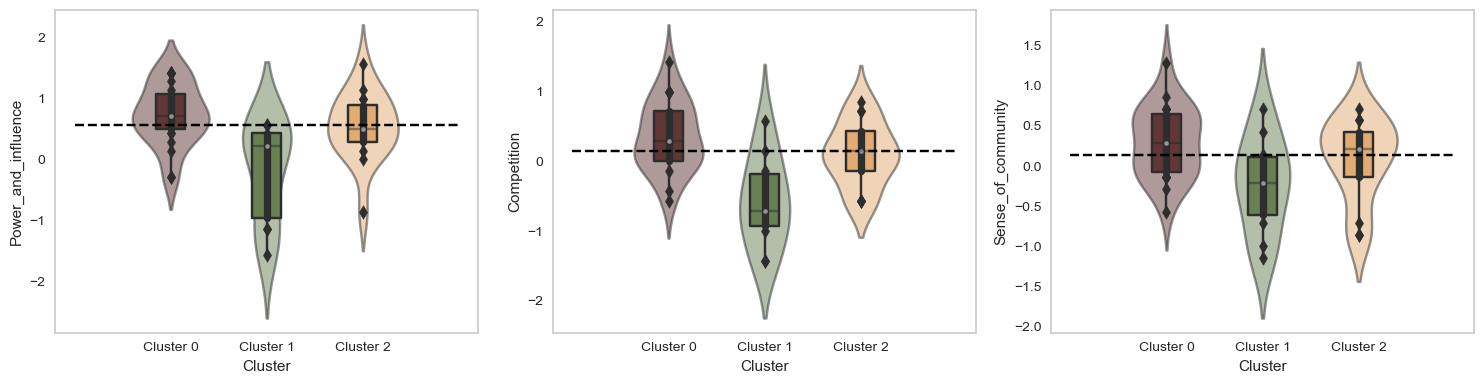

In [133]:
clusters_evaluation(df_pca,group1_list_1)

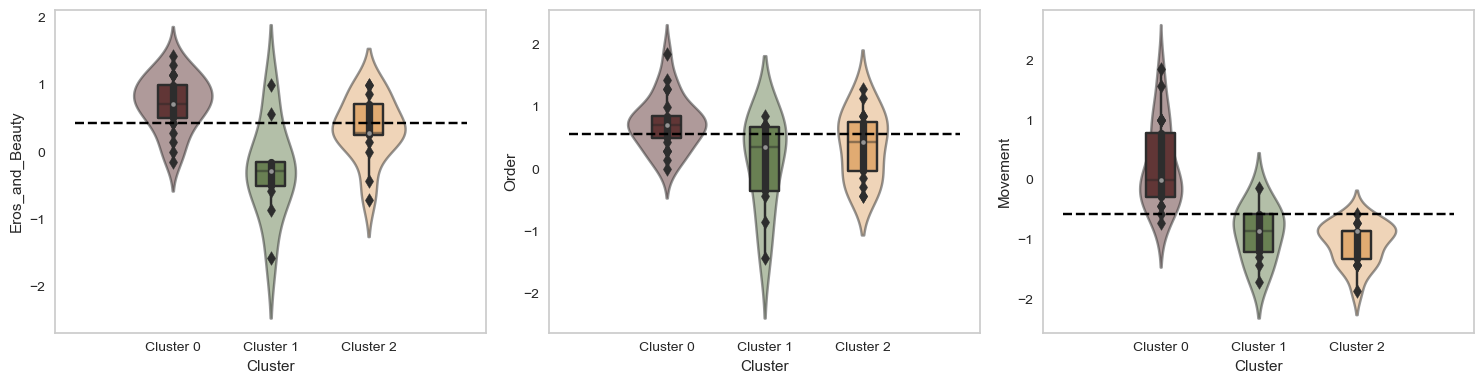

In [134]:
clusters_evaluation(df_pca,group1_list_2)


<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

#### Group 2: **Collector, Curiosity, Food**

</div>

In [120]:
group2_list = ['Collector', 'Curiosity', 'Food']

print('Patients in Cluster 0:')
cluster0_stats_group2 = cluster0_stats[['Collector', 'Curiosity', 'Food']]
display(cluster0_stats_group2)
print('--------------------------------------------------------------')

print('Patients in Cluster 1:')
cluster1_stats_group2 = cluster1_stats[['Collector', 'Curiosity', 'Food']]
display(cluster1_stats_group2)
print('--------------------------------------------------------------')

print('Patients in Cluster 2:')
cluster2_stats_group2 = cluster2_stats[['Collector', 'Curiosity', 'Food']]
display(cluster2_stats_group2)

Patients in Cluster 0:


,Collector,Curiosity,Food
count,23.000000,23.000000,23.000000
mean,0.037267,0.708075,0.869565
std,0.639192,0.431759,0.412947
min,-1.285714,-0.285714,0.285714
25%,-0.285714,0.428571,0.571429
50%,0.000000,0.571429,0.857143
75%,0.428571,0.857143,1.071429
max,1.428571,1.714286,1.857143


--------------------------------------------------------------
Patients in Cluster 1:


,Collector,Curiosity,Food
count,10.000000,10.000000,10.000000
mean,-0.557143,0.328571,-0.157143
std,0.569242,0.517494,0.565244
min,-1.428571,-0.428571,-1.000000
25%,-0.785714,0.035714,-0.535714
50%,-0.571429,0.214286,-0.142857
75%,-0.428571,0.535714,0.285714
max,0.714286,1.285714,0.571429


--------------------------------------------------------------
Patients in Cluster 2:


,Collector,Curiosity,Food
count,16.000000,16.000000,16.000000
mean,0.392857,0.964286,1.071429
std,0.607213,0.327846,0.414039
min,-0.285714,0.285714,0.428571
25%,-0.142857,0.857143,0.892857
50%,0.285714,0.928571,1.071429
75%,0.607143,1.071429,1.428571
max,1.571429,1.571429,1.714286


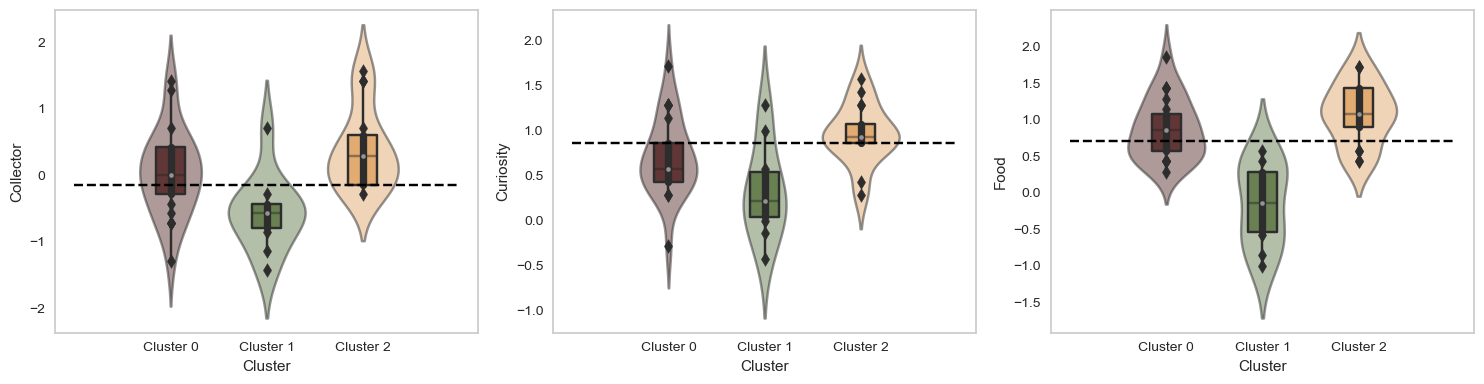

In [135]:
clusters_evaluation(df_pca,group2_list)

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

#### Group 3: **Appreciation, Emotional_calm**

</div>

In [95]:
group3_list = ['Appreciation', 'Emotional_calm']

print('Patients in Cluster 0:')
cluster0_stats_group3 = cluster0_stats[group3_list]
display(cluster0_stats_group3)
print('--------------------------------------------------------------')

print('Patients in Cluster 1:')
cluster1_stats_group3 = cluster1_stats[group3_list]
display(cluster1_stats_group3)
print('--------------------------------------------------------------')

print('Patients in Cluster 2:')
cluster2_stats_group3 = cluster2_stats[group3_list]
display(cluster2_stats_group3)

Patients in Cluster 0:


,Appreciation,Emotional_calm
count,23.000000,23.000000
mean,0.627329,0.931677
std,0.377324,0.461645
min,-0.142857,-0.142857
25%,0.428571,0.714286
50%,0.571429,1.000000
75%,0.857143,1.285714
max,1.285714,1.714286


--------------------------------------------------------------
Patients in Cluster 1:


,Appreciation,Emotional_calm
count,10.000000,10.000000
mean,0.471429,1.142857
std,0.602527,0.602339
min,-0.428571,0.000000
25%,0.000000,0.892857
50%,0.642857,1.214286
75%,0.857143,1.642857
max,1.142857,1.857143


--------------------------------------------------------------
Patients in Cluster 2:


,Appreciation,Emotional_calm
count,16.000000,16.000000
mean,0.526786,1.160714
std,0.385869,0.426583
min,0.142857,0.285714
25%,0.285714,0.857143
50%,0.285714,1.142857
75%,0.714286,1.571429
max,1.285714,1.857143


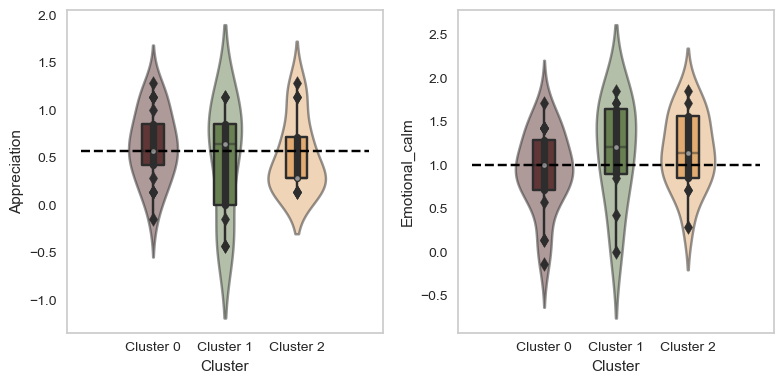

In [137]:
clusters_evaluation(df_pca,group3_list)

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

#### Group 4: **Sense_of_purpose**

</div>

In [109]:
group4_list = ['Sense_of_purpose']

print('Patients in Cluster 0:')
cluster0_stats_group4 = cluster0_stats[group4_list]
display(cluster0_stats_group4)
print('--------------------------------------------------------------')

print('Patients in Cluster 1:')
cluster1_stats_group4 = cluster1_stats[group4_list]
display(cluster1_stats_group4)
print('--------------------------------------------------------------')

print('Patients in Cluster 2:')
cluster2_stats_group4 = cluster2_stats[group4_list]
display(cluster2_stats_group4)

Patients in Cluster 0:


,Sense_of_purpose
count,23.000000
mean,0.118012
std,0.523390
min,-1.000000
25%,-0.071429
50%,0.000000
75%,0.357143
max,1.142857


--------------------------------------------------------------
Patients in Cluster 1:


,Sense_of_purpose
count,1.000000e+01
mean,-5.551115e-18
std,4.467063e-01
min,-8.571429e-01
25%,-2.142857e-01
50%,0.000000e+00
75%,2.500000e-01
max,7.142857e-01


--------------------------------------------------------------
Patients in Cluster 2:


,Sense_of_purpose
count,16.000000
mean,-0.035714
std,0.437992
min,-0.714286
25%,-0.428571
50%,-0.071429
75%,0.178571
max,1.000000


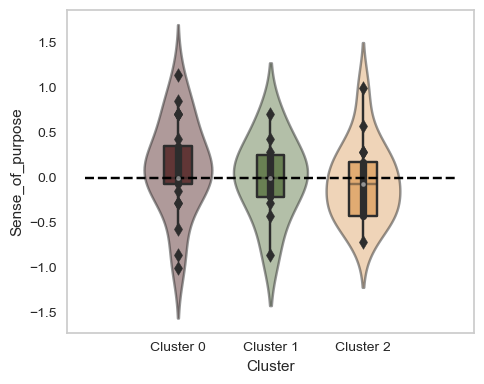

In [127]:
clusters_evaluation(df_pca,group4_list)

<div style="color:white; background-color:  #edeae5; padding: 10px;color : black">

#### *Interpretation of all results is available as a PDF report called: Final_report_motivation_challenge*

</div>